In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [200]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [201]:
train_copy=train.copy()

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
[train.shape, test.shape]

[(891, 12), (418, 11)]

In [202]:
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [128]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [203]:
Survived=train['Survived']

In [204]:
train=train.drop('Survived', axis=1)

In [205]:
df=pd.concat([train, test], keys=['train', 'test'], axis=0)

In [185]:
df.shape

(1309, 10)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 155.6+ KB


In [33]:
df.tail(3)

Pclass                          Name   Sex   Age  SibSp  \
      PassengerId                                                            
train 1307              3  Saether, Mr. Simon Sivertsen  male  38.5      0   
      1308              3           Ware, Mr. Frederick  male   NaN      0   
      1309              3      Peter, Master. Michael J  male   NaN      1   

                   Parch              Ticket     Fare Cabin Embarked  
      PassengerId                                                     
train 1307             0  SOTON/O.Q. 3101262   7.2500   NaN        S  
      1308             0              359309   8.0500   NaN        S  
      1309             1                2668  22.3583   NaN        C

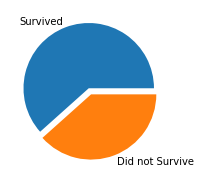

In [34]:
fig, ax = plt.subplots(figsize=(5,3))
plt.pie(x=train_copy["Survived"].value_counts(), labels=["Survived","Did not Survive"], explode = (0, 0.1))
plt.show()

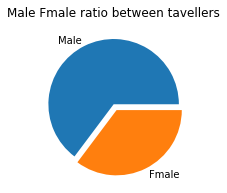

In [35]:
fig, ax = plt.subplots(figsize=(5,3))
plt.pie(x=train_copy["Sex"].value_counts(), labels=["Male","Fmale"], explode = (0, 0.1))
plt.title('Male Fmale ratio between tavellers')
plt.show()

In [36]:
data=train_copy.copy()

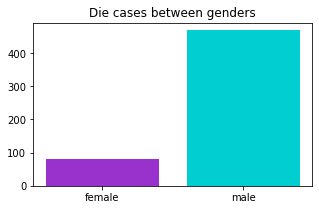

In [37]:
df1=data[data['Survived']==0].groupby('Sex').count()['Survived']
plt.figure(figsize=(5,3))
plt.bar(df1.index, df1.values, color=['darkorchid', 'darkturquoise'])  
plt.title('Die cases between genders')
plt.show()

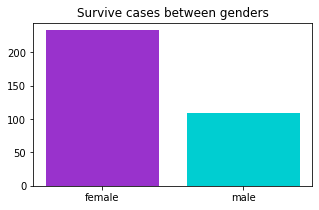

In [38]:
df1=data[data['Survived']==1].groupby('Sex').count()['Survived']
plt.figure(figsize=(5,3))
plt.bar(df1.index, df1.values, color=['darkorchid', 'darkturquoise'])  
plt.title('Survive cases between genders')
plt.show()

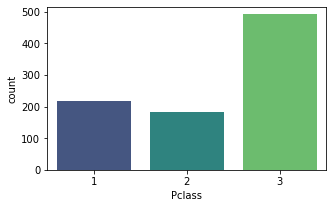

In [39]:
plt.figure(figsize=(5,3))
sns.countplot(x=data["Pclass"], palette='viridis')
plt.show()

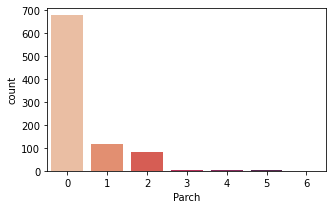

In [40]:
plt.figure(figsize=(5,3))
sns.countplot(x=data["Parch"], palette='rocket_r')
plt.show()

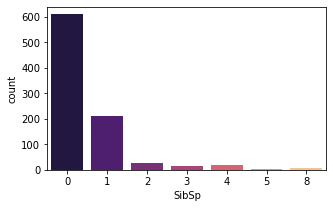

In [41]:
plt.figure(figsize=(5,3))
sns.countplot(x=data["SibSp"], palette='magma')
plt.show()

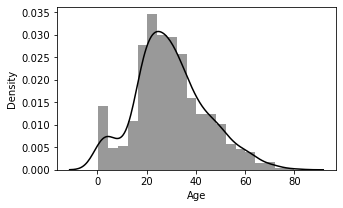

In [42]:
plt.figure(figsize=(5,3))
sns.distplot(data["Age"], color='black')
plt.show()

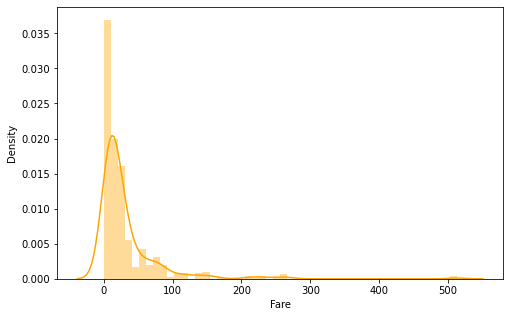

In [43]:
plt.figure(figsize=(8,5))
sns.distplot(data["Fare"], color='orange')
plt.show()

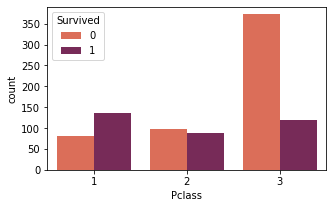

In [44]:
plt.figure(figsize=(5,3))
sns.countplot(data['Pclass'], hue = data['Survived'], palette="rocket_r")
plt.show()

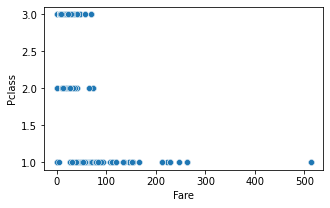

In [45]:
plt.figure(figsize=(5,3))
sns.scatterplot(x= data['Fare'], y=data['Pclass'])
plt.show()

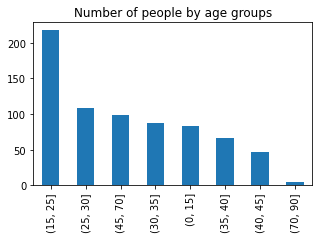

In [46]:
data.age_group = pd.cut(x=data['Age'], bins=[0,15, 25, 30, 35, 40, 45, 70, 90], ).astype("O")
plt.figure(figsize=(5,3))
plt.title('Number of people by age groups')
plt.xticks(rotation=180)
data.age_group.value_counts().plot.bar()
plt.show()

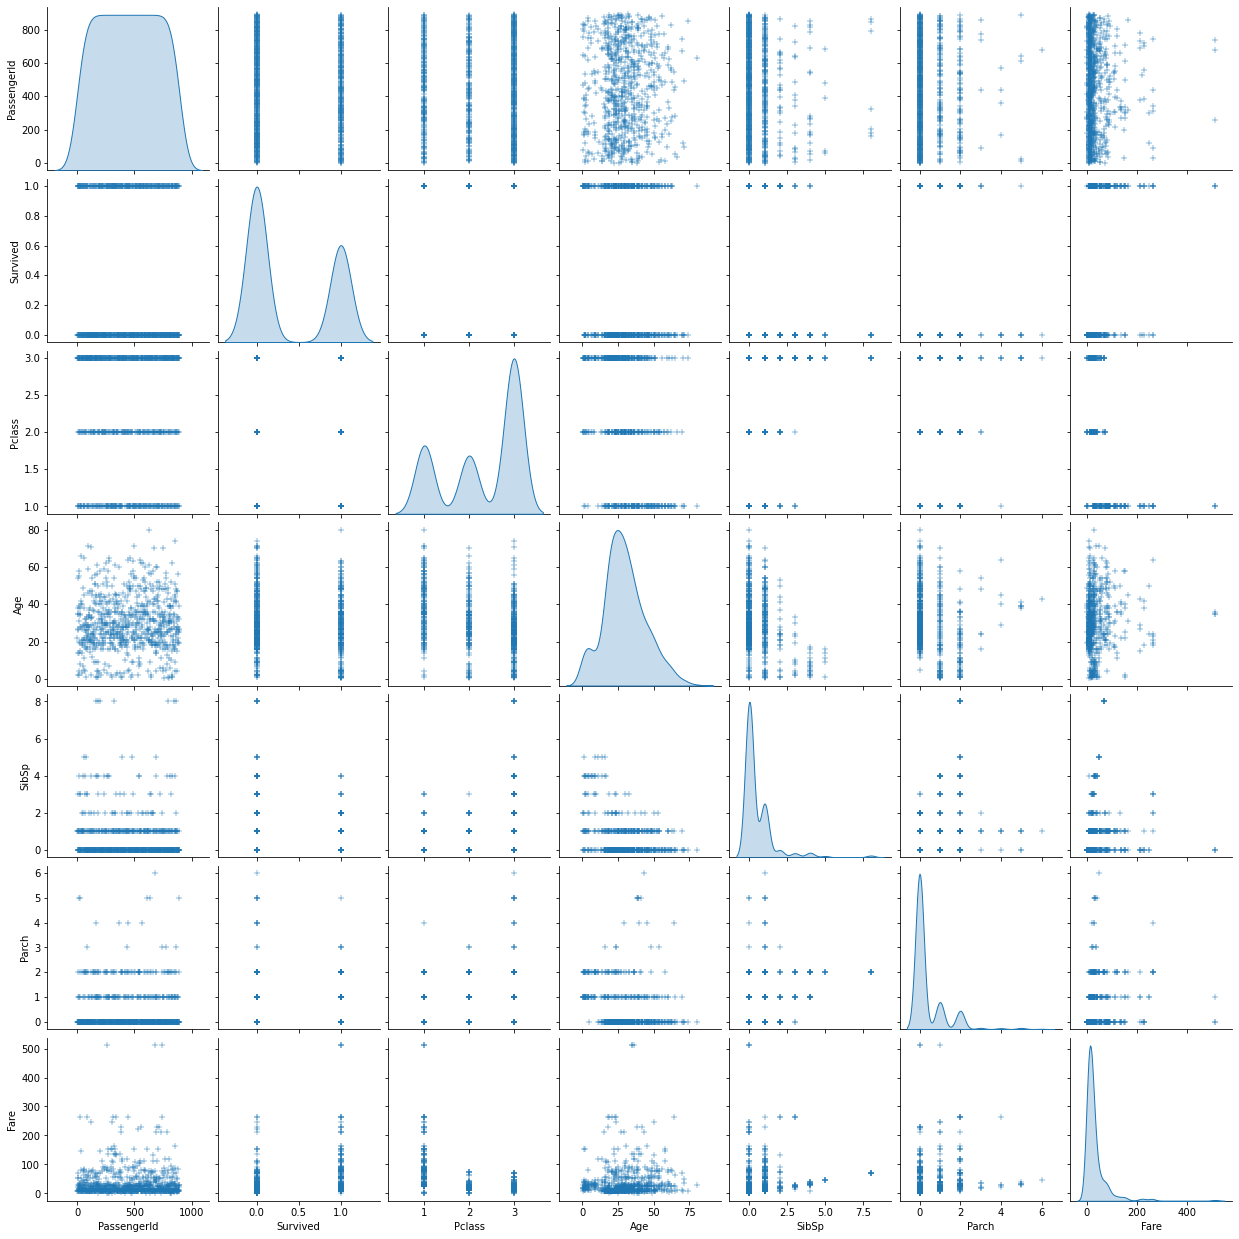

In [47]:
sns.pairplot(data, diag_kind='kde', markers='+')

# Missing Values 

In [206]:
nulls = df.isnull().sum()
print(nulls[nulls > 0])

Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64


In [207]:
nulls = df.isnull().sum()/df.shape[0]
print(nulls[nulls > 0])

Age         0.200917
Fare        0.000764
Cabin       0.774637
Embarked    0.001528
dtype: float64


In [208]:
df.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Filling 2 Null values with most frequent

In [209]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].value_counts().sort_values(ascending=False).index[0])

In [210]:
#More than 75% of cabin data is missing
df=df.drop('Cabin', axis=1)

In [211]:
nulls = df.isnull().sum()
print(nulls[nulls > 0])

Age     263
Fare      1
dtype: int64


In [212]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [213]:
print(df.isnull().sum().sum()==0)

True


# Handling Outliers

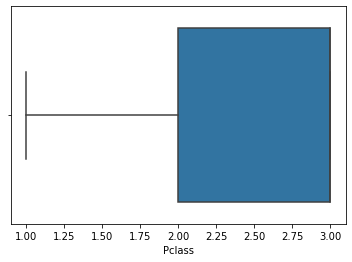

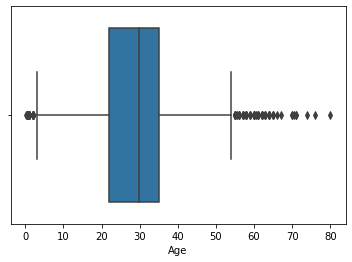

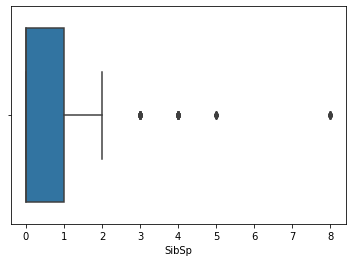

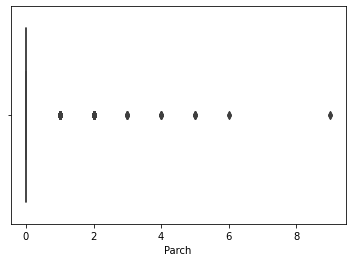

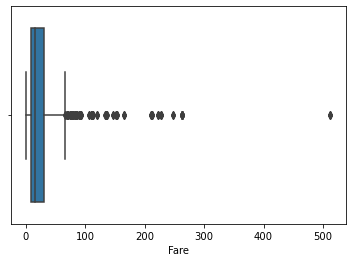

In [214]:
for col in df._get_numeric_data().columns:
    sns.boxplot(df[col])
    plt.show()

In [215]:
def thresholds(dataframe, col_name, q1=0.25, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    IQR = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * IQR
    low_limit = quartile1 - 1.5 * IQR
    dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
    dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    return dataframe

In [216]:
outlier_cols=['Fare', 'Age']

In [217]:
for col in outlier_cols:
    df=thresholds(df, col)

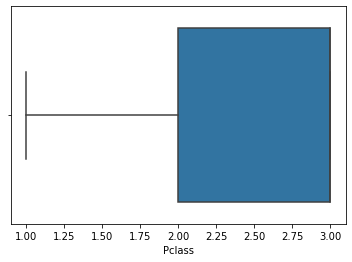

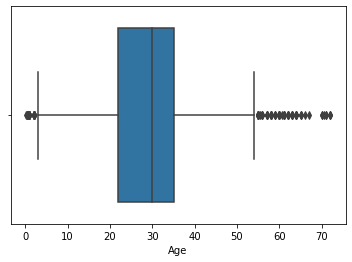

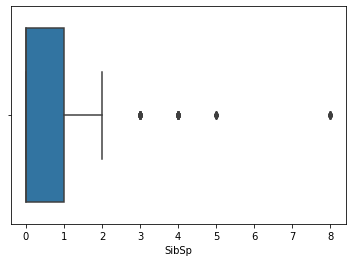

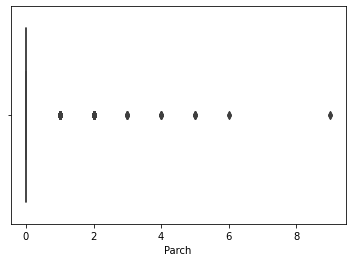

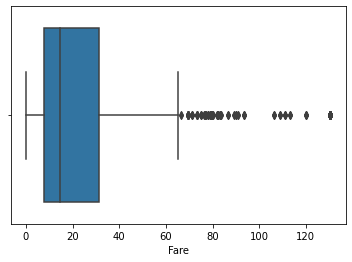

In [218]:
for col in df._get_numeric_data().columns:
    sns.boxplot(df[col])
    plt.show()

# Encoding

In [219]:
df=pd.get_dummies(df, drop_first=True)

In [220]:
Train=df.loc['train']
Test=df.loc['test']

In [221]:
print(Train.shape, Test.shape)

(891, 2242) (418, 2242)


In [222]:
Train['Survived']=Survived

# Model

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [229]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [224]:
Y=Train['Survived']
X=Train.drop(['Survived'], axis=1)
print(Y.shape, X.shape)

(891,) (891, 2242)


In [225]:
def best_randomstate(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i, stratify=y)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        accu=accuracy_score(p,ytest)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [230]:
randomstate=best_randomstate(X,Y)
randomstate

153

In [231]:
model_parameters={
    'Logistic Regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {'C': list(range(1,50))}},
    'Random Forest Classifier': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': list(range(1,50))}},
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {'criterion': ['gini','entropy']}}, 
    'Support Vector Machine': {
        'model': svm.SVC(gamma='scale'),
        'params': {'C': list(range(1,10))+ [0.1, 0.5], 'kernel': ['rbf','linear', 'poly']}},
    'Ada Boost Classifier': {
        'model': AdaBoostClassifier(), 
        'params': {'n_estimators': list(range(55,60)), 'algorithm': ['SAMME', 'SAMME.R']}},
    'Gradient Boosting Classifier': {
        'model': GradientBoostingClassifier(), 
        'params': {'n_estimators': list(range(100, 102)), 'criterion': ['friedman_mse', 'mse', 'mae']}},
    'XGBoost Classifier': {
        'model': XGBClassifier(),
        'params': {'gamma': list(range(0,3)), 'max_depth': list(range(1,3))}},
}

In [232]:
def performance(model_name, acc_score, prec_score, rec_score, auc_roc_score):
    print(model_name)
    print(f'Accuracy score: {acc_score}')
    print(f'Precision score: {prec_score}')
    print(f'Recall score: {rec_score}')
    print(f'Aoc Roc score: {auc_roc_score}')
    print('---------------------------------------')

In [233]:
def classification_models(x,y, model_params):
    results=[]
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=randomstate, stratify=Y)  
    for model_name, mp in model_params.items():
        clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
        clf.fit(X_train, Y_train)
        Y_train_pred=clf.predict(X_test)
        acc_score=np.round(accuracy_score(Y_train_pred, Y_test), 4)
        prec_score=np.round(precision_score(Y_train_pred, Y_test), 4)
        rec_score=np.round(recall_score(Y_train_pred, Y_test), 4)
        auc_roc_score=np.round(roc_auc_score(Y_train_pred, Y_test), 4)
        results.append({'model': model_name, 
                        'accuracy_score': acc_score,
                        'precision_score': prec_score,
                        'recall_score': rec_score,
                        'auc_roc_score': auc_roc_score,
                        'best_score': clf.best_score_,
                        'best_params': clf.best_params_})
        performance(model_name, acc_score, prec_score, rec_score, auc_roc_score)
    return results

In [234]:
scores = classification_models(X, Y, model_parameters)

Logistic Regression
Accuracy score: 0.8883
Precision score: 0.7971
Recall score: 0.9016
Aoc Roc score: 0.8915
---------------------------------------
Random Forest Classifier
Accuracy score: 0.8547
Precision score: 0.7681
Recall score: 0.8413
Aoc Roc score: 0.8517
---------------------------------------
Decision Tree Classifier
Accuracy score: 0.8603
Precision score: 0.8261
Recall score: 0.8143
Aoc Roc score: 0.8521
---------------------------------------
Support Vector Machine
Accuracy score: 0.8827
Precision score: 0.8116
Recall score: 0.875
Aoc Roc score: 0.881
---------------------------------------
Ada Boost Classifier
Accuracy score: 0.8939
Precision score: 0.8116
Recall score: 0.9032
Aoc Roc score: 0.8961
---------------------------------------
Gradient Boosting Classifier
Accuracy score: 0.8771
Precision score: 0.7536
Recall score: 0.9123
Aoc Roc score: 0.8865
---------------------------------------
[22:07:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the defa

[22:08:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier
Accuracy score: 0.8827
Precision score: 0.7971
Recall score: 0.8871
Aoc Roc score: 0.8837
---------------------------------------


In [235]:
res = pd.DataFrame(scores, columns=['model','accuracy_score', 'precision_score', 'recall_score', 'auc_roc_score', 'best_score', 'best_params'])
res.sort_values('accuracy_score', ascending = False).reset_index(drop=True)

,model,accuracy_score,precision_score,recall_score,auc_roc_score,best_score,best_params
0,Ada Boost Classifier,0.8939,0.8116,0.9032,0.8961,0.787954,"{'algorithm': 'SAMME', 'n_estimators': 56}"
1,Logistic Regression,0.8883,0.7971,0.9016,0.8915,0.804806,{'C': 32}
2,Support Vector Machine,0.8827,0.8116,0.8750,0.8810,0.810371,"{'C': 2, 'kernel': 'linear'}"
3,XGBoost Classifier,0.8827,0.7971,0.8871,0.8837,0.824416,"{'gamma': 0, 'max_depth': 2}"
4,Gradient Boosting Classifier,0.8771,0.7536,0.9123,0.8865,0.804787,"{'criterion': 'mse', 'n_estimators': 101}"
5,Decision Tree Classifier,0.8603,0.8261,0.8143,0.8521,0.818842,{'criterion': 'entropy'}
6,Random Forest Classifier,0.8547,0.7681,0.8413,0.8517,0.818822,{'n_estimators': 30}


# Finalizing The Model

In [236]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=randomstate, stratify=Y)
model=AdaBoostClassifier(algorithm='SAMME', n_estimators=56)
model.fit(X_train, Y_train)
Y_train_pred=model.predict(X_test)
performance('Ada Boost Classifier', np.round(accuracy_score(Y_train_pred, Y_test), 4), 
                                    np.round(precision_score(Y_train_pred, Y_test), 4), 
                                    np.round(recall_score(Y_train_pred, Y_test), 4), 
                                    np.round(roc_auc_score(Y_train_pred, Y_test), 4))

Ada Boost Classifier
Accuracy score: 0.8939
Precision score: 0.8116
Recall score: 0.9032
Aoc Roc score: 0.8961
---------------------------------------


In [237]:
#Calling model with best parameters
model=AdaBoostClassifier(algorithm='SAMME', n_estimators=56)
model.fit(X, Y)
pr=model.predict(Test)

In [241]:
res1=[i for i in pr]
submission=pd.DataFrame()
submission['PassengerId']=test.index
submission['Survived']=res1

In [242]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [243]:
submission.to_csv('final.csv',index=False)